3


[[7.76129595 1.4206945  1.21924446 ... 0.7116557  0.58552368 0.19327994]
 [0.19072871 2.94625738 1.40247633 ... 1.5086527  0.5032523  1.36145673]
 [0.66526914 0.09266894 0.19102644 ... 0.21123901 0.65276875 1.54465672]
 ...
 [0.70345774 2.72826132 0.67963112 ... 1.43873191 3.94509515 0.35957959]
 [1.20630216 1.88169861 1.48892401 ... 1.10179731 0.41722782 0.86456979]
 [0.09572599 0.70979073 0.84012508 ... 4.23074698 0.65645539 0.31265145]]
(100, 1000)


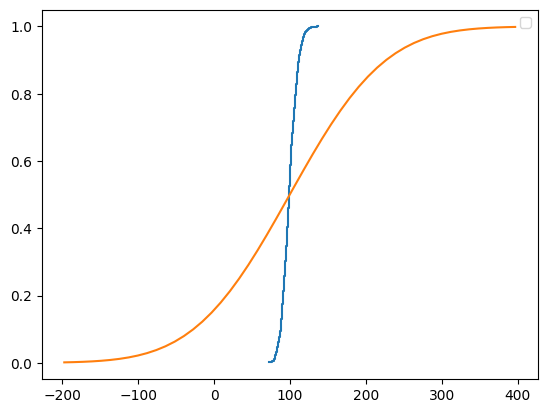

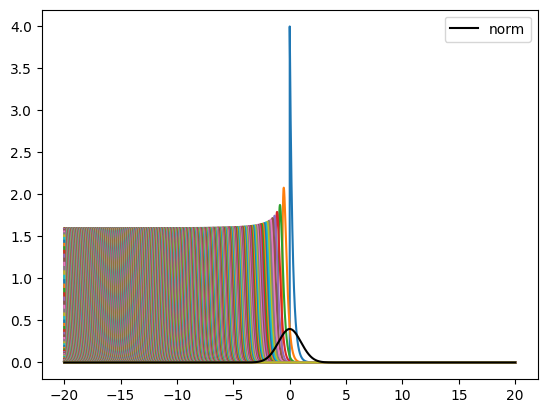

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import scipy.stats as stats


#Задание 1
n=100
a = int(input())
if a == 1:
    a = "binomial"
    args = [1, 0.5, 1000]
if a == 2:
    a = "uniform"
    args = [0, 1, 1000]
if a == 3:
    a = "exponential"
    args = [1, 1000]
if a == 4:
    a = "standard_cauchy"
    args = [1000]

X = getattr(np.random, a)(*args)

for i in range(n-1):
    Y = getattr(np.random, a)(*args)
    X = np.vstack([X, Y])
print(X)
print(np.shape(X))

S = np.sum(X, axis=0)
ecdf = sm.distributions.ECDF(S)


x = np.linspace(min(S), max(S))
plt.step(x, ecdf(x))

mu = n*X.mean()
sigma = n*X.var()

x = np.linspace(mu - 3*sigma, mu + 3*sigma)
y = norm.cdf(x, mu, (sigma))

plt.plot(x, y)

plt.legend()

plt.show()


x = np.arange(-20, 20, 0.001)
for i in range(1,1000):
    gamma=np.sqrt(16*i)*stats.gamma.pdf(np.sqrt(16*i)*x+4*i, i, 4)
    plt.plot(x, gamma)
plt.plot(x, stats.norm.pdf(x, 0, 1), label = 'norm', color='black')
plt.legend()
plt.show()


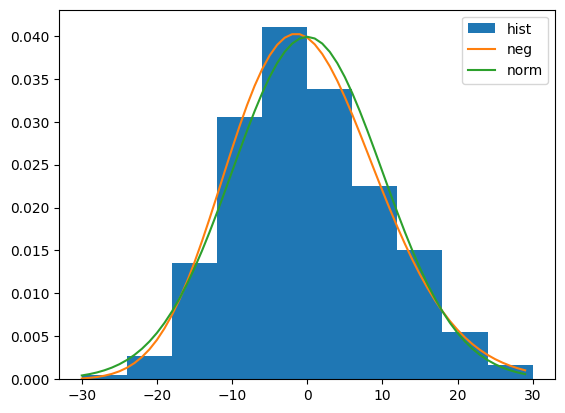

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import binom
from scipy.stats import norm
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import scipy.stats as stats
import scipy.special as special

'''def convert_params(mu, theta):
    r = theta
    var = mu + 1 / r * mu ** 2
    p = (var - mu) / var
    return r, 1 - p

def pmf(counts, mu, theta):
    """
    >>> import numpy as np
    >>> from scipy.stats import poisson
    >>> np.isclose(pmf(10, 10, 10000), poisson.pmf(10, 10), atol=1e-3)
    True
    """
    return nbinom.pmf(counts, *convert_params(mu, theta))'''

n=50
k=1000
p=0.5
X = np.random.geometric(p, size=k)
for i in range(n-1):
  Y = np.random.geometric(p, size=k)
  X = np.vstack([X, Y])
S = np.sum(X, axis=0)
a=1/p
for i in range (k):
  S[i]-=n*a

plt.hist(S, 10, density=True, label='hist', range=(-30,30))

sigma=np.sqrt(n*(1-p)/np.square(p))

m=a*(1-p)

x=np.arange(-30, 30, 1)

plt.plot(x ,stats.nbinom.pmf(x+n*m, n, p), label='neg')

plt.plot(x, stats.norm.pdf(x, loc=0, scale=sigma), label='norm')

plt.legend()
plt.show()



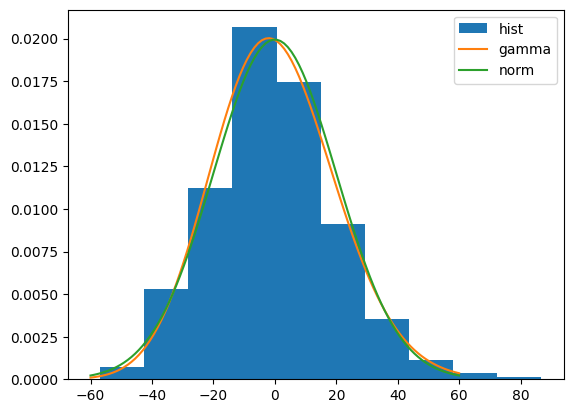

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import scipy.stats as stats

n = 50
k=1000
a=2
b=2
X = np.random.gamma(a, b, size=k)
for i in range(n-1):
  Y = np.random.gamma(a, b, size=k)
  X = np.vstack([X, Y])
S = np.sum(X, axis=0)
m=a*b
for i in range (k):
  S[i]-=n*m

plt.hist(S, density=True, label='hist')

x=np.linspace(-60, 60, 100)

plt.plot(x ,stats.gamma.pdf(x+n*m, a=n*a, loc=0, scale=b), label='gamma')

sigma=np.sqrt(n*a*b*b)

plt.plot(x, stats.norm.pdf(x, loc=0, scale=sigma), label='norm')

plt.legend()
plt.show()

5
10
20
50
100
500
0.5


Text(0.5, 1.0, 'Бернулли n = 500')

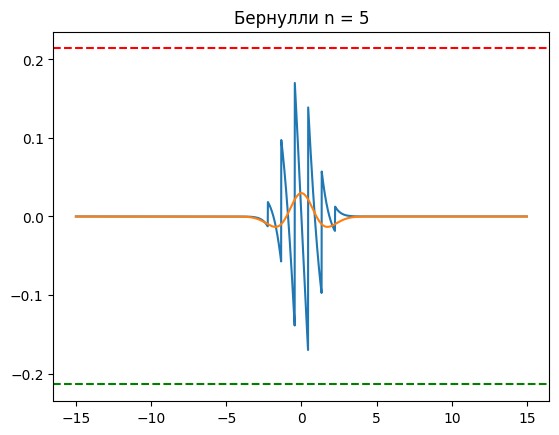

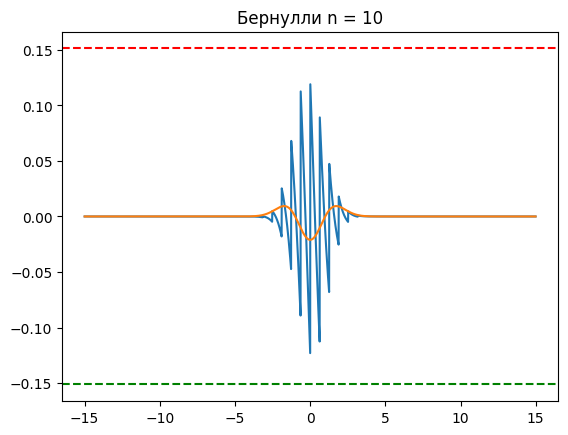

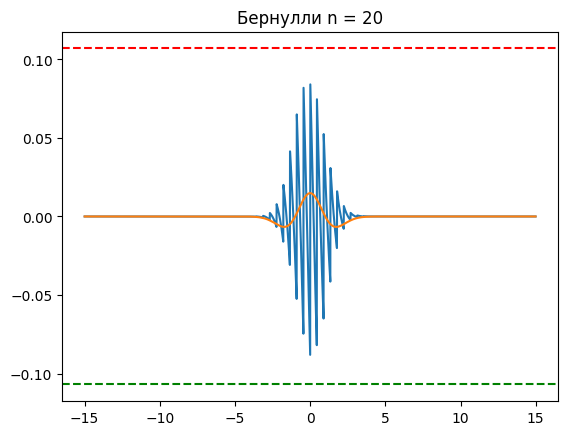

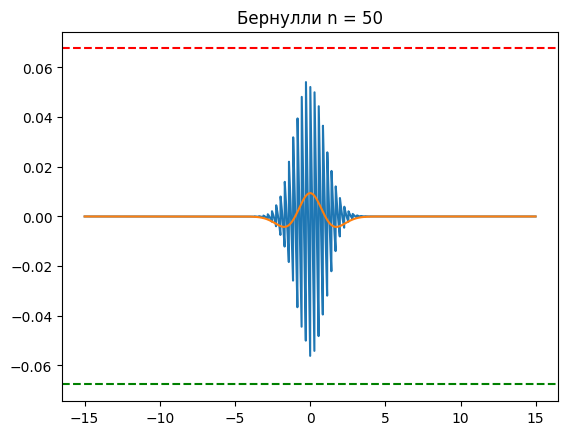

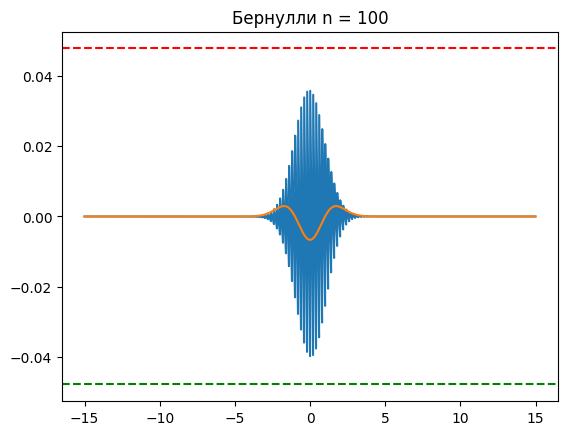

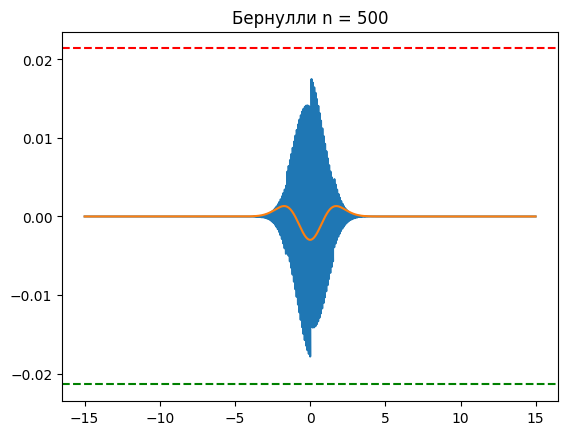

In [ ]:
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import scipy.stats as stats
n1 = int(input())
n2 = int(input())
n3 = int(input())
n4 = int(input())
n5 = int(input())
n6 = int(input())
a = float(input()) ##параметр для р-ий


bernoulli_rv = stats.bernoulli(a)
Y = bernoulli_rv.rvs(n1)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n1))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n1))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n1) + a*n1, n = n1, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 5')

Y = bernoulli_rv.rvs(n2)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n2))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n2))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n2) + a*n2, n = n2, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 10')

Y = bernoulli_rv.rvs(n3)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n3))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n3))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n3) + a*n3, n = n3, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 20')

Y = bernoulli_rv.rvs(n4)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n4))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n4))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n4) + a*n4, n = n4, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 50')

Y = bernoulli_rv.rvs(n5)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n5))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n5))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n5) + a*n5, n = n5, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 100')

Y = bernoulli_rv.rvs(n6)
const = 0.4784*np.mean(np.fabs(Y[0] - a)**3)/(np.sqrt((a*(1-a))**3 *n6))

r3 = np.mean((Y[0] - a)**3)
a3 = r3/((a*(1-a))**(3/2))
f = (a3*(1 - x*x)*np.exp(-(x*x)/2))/(6*np.sqrt(2*math.pi*n6))

plt.figure()
x = np.arange(-15, 15, 0.01)
plt.plot(x, stats.binom.cdf(x*np.sqrt(a*(1-a)*n6) + a*n6, n = n6, p = a) - stats.norm.cdf(x, loc = 0,scale = 1))
plt.axhline (y= const, color='red', linestyle='--')
plt.axhline (y= (-1) * const, color='green', linestyle='--')
plt.plot(x, f)
plt.title('Бернулли n = 500')


1000
10
2


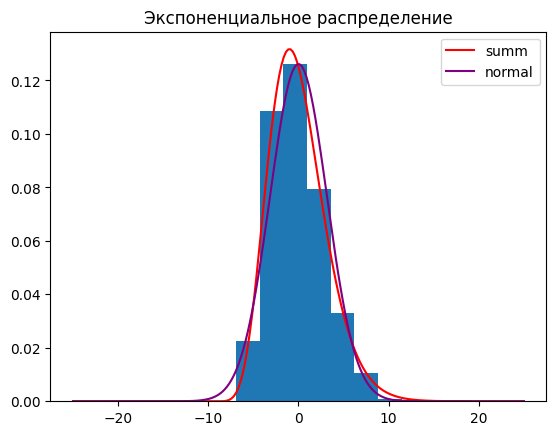

In [ ]:
from scipy.stats import norm
from scipy.stats import poisson
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
import scipy.stats as stats

k = int(input())
n = int(input())
lambd = int(input())
S = []

for i in range(k):
  sample = stats.expon.rvs(lambd, size = n)
  s = sample.sum() - n*stats.expon.mean(lambd)
  S.append(s)
plt.hist(S, density = True)
xmin = -25
xmax = 25
xlist = np.linspace(xmin,xmax,200)
ylist1 = [stats.gamma.pdf(x + stats.gamma.mean(n, 1 / lambd), n, 1 / lambd) for x in xlist]
ylist2 = [stats.norm.pdf(x, loc = 0, scale = stats.expon.var(lambd)*np.sqrt(n)) for x in xlist]
plt.plot(xlist, ylist1, label = 'summ', color = 'red')
plt.plot(xlist, ylist2, label = 'normal', color = 'purple')
plt.title('Экспоненциальное распределение')
plt.legend()